In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
from sklearn import set_config 


#calculate wbgt with R script /research/calculate_wbgt.R using the data for each statio and year from:
#https://www.meteoswiss.admin.ch/home/climate/swiss-climate-in-detail/climate-scenarios-indoor-climate.html
wbgt = "".join(["/Users/szelie/OneDrive - ETH Zurich/data/heat/ch2018_buildings/ch2018_raumklima_wbgt/wbgt.csv"])
wbgt = pd.read_csv(wbgt)


In [49]:
min_T = wbgt[['time.mm', 'time.dd', 'tre200h0','station']].groupby(['time.mm','time.dd', 'station']).min().reset_index()
max_T = wbgt[['time.mm', 'time.dd', 'tre200h0','station']].groupby(['time.mm','time.dd', 'station']).max().reset_index()
min_T = min_T.rename(columns={'tre200h0':'tasmin'})
max_T = max_T.rename(columns={'tre200h0':'tasmax'})
wbgt = pd.merge(wbgt,min_T, on=['time.mm','time.dd', 'station'])
wbgt = pd.merge(wbgt,max_T, on=['time.mm','time.dd', 'station'])
wbgt =wbgt[wbgt['tasmax']>23]
wbgt = wbgt.dropna()
wbgt = wbgt[(wbgt['time.hh']>8)&(wbgt['time.hh']<18)]
X = wbgt[['time.hh','tasmin','tasmax']] 
Y = wbgt['wbgt_sun']

from sklearn.model_selection import train_test_split
from sklearn import linear_model
# splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)


In [99]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

rfr_sun = RandomForestRegressor(n_estimators=10, max_depth=10)


i = 1

for train_index, test_index in kf5.split(wbgt):
    X_train = wbgt.iloc[train_index][['time.hh','tasmin','tasmax']]
    X_test = wbgt.iloc[test_index][['time.hh','tasmin','tasmax']]
    y_train = wbgt.iloc[train_index][['wbgt_sun']]
    y_test = wbgt.iloc[test_index]['wbgt_sun']
        
    #Train the model
    rfr_sun.fit(X_train, y_train) #Training the model
    y_prediction_rfr = rfr_sun.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(y_test,y_prediction_rfr))

    print(f"Accuracy for the fold no. {i} on the test set: {rmse}")
    i += 1

/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_66183/4082468583.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_sun.fit(X_train, y_train) #Training the model


Accuracy for the fold no. 1 on the test set: 1.785444899995595
Accuracy for the fold no. 2 on the test set: 1.8103796037405315


/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_66183/4082468583.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_sun.fit(X_train, y_train) #Training the model
/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_66183/4082468583.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_sun.fit(X_train, y_train) #Training the model


Accuracy for the fold no. 3 on the test set: 1.9413078815238352


/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_66183/4082468583.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_sun.fit(X_train, y_train) #Training the model


Accuracy for the fold no. 4 on the test set: 1.8691114343596698


/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_66183/4082468583.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_sun.fit(X_train, y_train) #Training the model


Accuracy for the fold no. 5 on the test set: 1.8867375388544059


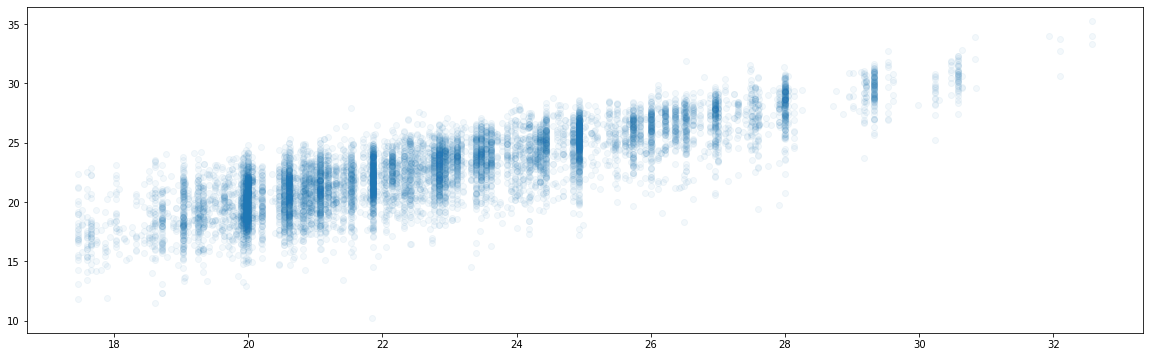

In [48]:
import statsmodels.api as sm

model = sm.OLS(Y, X).fit()
y_prediction = model.predict(x_test) 
import numpy as np
from sklearn.metrics import mean_squared_error

fig, ax = plt.subplots(figsize=(20,6))
#ax.scatter(y_prediction, y_test)
ax.scatter(y_prediction_rfr, y_test,alpha=0.05)

In [42]:
import joblib
joblib.dump(rfr_sun, "/Users/szelie/python_projects/heat_mortality_productivity_impacts/input_data/regressions/random_forest_wbgt_sun.joblib")


['/Users/szelie/python_projects/heat_mortality_productivity_impacts/input_data/regressions/random_forest_wbgt_sun.joblib']

In [104]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

rfr_shadow = RandomForestRegressor(n_estimators=10, max_depth=10)

rmse_list =[]

i = 1

for train_index, test_index in kf5.split(wbgt):
    X_train = wbgt.iloc[train_index][['time.hh','tasmin','tasmax']]
    X_test = wbgt.iloc[test_index][['time.hh','tasmin','tasmax']]
    y_train = wbgt.iloc[train_index][['wbgt_shadow']]
    y_test = wbgt.iloc[test_index]['wbgt_shadow']
        
    #Train the model
    rfr_shadow.fit(X_train, y_train) #Training the model
    y_prediction_rfr = rfr_shadow.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(y_test,y_prediction_rfr))
    rmse_list.append(rmse)
    print(f"Accuracy for the fold no. {i} on the test set: {rmse}")
    i += 1

/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_66183/2006985803.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_shadow.fit(X_train, y_train) #Training the model


Accuracy for the fold no. 1 on the test set: 1.1764605481081134
Accuracy for the fold no. 2 on the test set: 1.0459592462184286


/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_66183/2006985803.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_shadow.fit(X_train, y_train) #Training the model
/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_66183/2006985803.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_shadow.fit(X_train, y_train) #Training the model


Accuracy for the fold no. 3 on the test set: 1.1246257431120652
Accuracy for the fold no. 4 on the test set: 1.0957841751315776


/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_66183/2006985803.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_shadow.fit(X_train, y_train) #Training the model


Accuracy for the fold no. 5 on the test set: 1.19056723098898


/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_66183/2006985803.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_shadow.fit(X_train, y_train) #Training the model


In [58]:
np.mean(rmse_list)

1.0596349781255197

In [59]:
import joblib
joblib.dump(rfr_shadow, "/Users/szelie/python_projects/heat_mortality_productivity_impacts/input_data/regressions/random_forest_wbgt_shadow.joblib")

['/Users/szelie/python_projects/heat_mortality_productivity_impacts/input_data/regressions/random_forest_wbgt_shadow.joblib']

In [153]:
wbgt_inside = pd.read_csv("/Users/szelie/python_projects/heat_mortality_productivity_impacts/input_data/wbgt/operating_temperature_2060.csv")
wbgt_inside = wbgt_inside[['time.dd', 'date','time.mm', 'time.hh', 'wbgt_inside','wbgt_sun','wbgt_shadow', 'tre200h0', 'operating_temperature']]
min_T = wbgt_inside[['time.mm', 'time.dd', 'tre200h0']].groupby(['time.mm','time.dd']).min().reset_index()
max_T = wbgt_inside[['time.mm', 'time.dd', 'tre200h0']].groupby(['time.mm','time.dd']).max().reset_index()

min_T = min_T.rename(columns={'tre200h0':'tasmin'})
max_T = max_T.rename(columns={'tre200h0':'tasmax'})

wbgt_inside = pd.merge(wbgt_inside,min_T, on=['time.mm','time.dd'])
wbgt_inside = pd.merge(wbgt_inside,max_T, on=['time.mm','time.dd'])
wbgt_inside =wbgt_inside[wbgt_inside['tasmax']>23]
wbgt_inside = wbgt_inside[(wbgt_inside['time.hh']>8)&(wbgt_inside['time.hh']<18)]




In [150]:
wbgt_inside

,time.dd,date,time.mm,time.hh,wbgt_inside,wbgt_sun,wbgt_shadow,tre200h0,operating_temperature,tasmin,tasmax
96,5,2060-05-05 00:00:00,5,0,18.485439,17.142404,17.142404,18.8,20.346427,16.5,25.3
97,5,2060-05-05 01:00:00,5,1,18.458951,17.338507,17.338507,18.7,20.036012,16.5,25.3
98,5,2060-05-05 02:00:00,5,2,17.906576,17.102260,17.102260,19.0,19.774889,16.5,25.3
99,5,2060-05-05 03:00:00,5,3,17.826072,16.742221,16.742221,18.6,19.547081,16.5,25.3
100,5,2060-05-05 04:00:00,5,4,17.664617,16.593835,16.593835,18.0,19.289886,16.5,25.3
...,...,...,...,...,...,...,...,...,...,...,...
3331,16,2060-09-16 19:00:00,9,19,19.255110,17.905751,17.905751,20.7,22.316341,17.1,24.8
3332,16,2060-09-16 20:00:00,9,20,19.095201,17.759294,17.759294,20.6,22.057710,17.1,24.8
3333,16,2060-09-16 21:00:00,9,21,18.898205,17.345239,17.345239,19.9,21.774686,17.1,24.8
3334,16,2060-09-16 22:00:00,9,22,18.775614,16.885059,16.885059,19.0,21.417830,17.1,24.8


In [138]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

kf5 = KFold(n_splits=5, shuffle=False)
kf3 = KFold(n_splits=3, shuffle=False)

rfr_inside = RandomForestRegressor(n_estimators=10, max_depth=10)

rmse_list =[]

i = 1

for train_index, test_index in kf5.split(wbgt_inside):
    X_train = wbgt_inside.iloc[train_index][['time.hh','tasmin','tasmax']]
    X_test = wbgt_inside.iloc[test_index][['time.hh','tasmin','tasmax']]
    y_train = wbgt_inside.iloc[train_index][['wbgt_inside']]
    y_test = wbgt_inside.iloc[test_index]['wbgt_inside']
        
    #Train the model
    rfr_inside.fit(X_train, y_train) #Training the model
    y_prediction_rfr = rfr_inside.predict(X_test) 
    rmse = np.sqrt(mean_squared_error(y_test,y_prediction_rfr))
    rmse_list.append(rmse)
    print(f"Accuracy for the fold no. {i} on the test set: {rmse}")
    i += 1

Accuracy for the fold no. 1 on the test set: 1.0196836329239258
Accuracy for the fold no. 2 on the test set: 0.8632509413330405
Accuracy for the fold no. 3 on the test set: 1.0039511383269621
Accuracy for the fold no. 4 on the test set: 0.7413851449680515
Accuracy for the fold no. 5 on the test set: 0.8801370686796414


/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_66183/1479356890.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_inside.fit(X_train, y_train) #Training the model
/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_66183/1479356890.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_inside.fit(X_train, y_train) #Training the model
/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_66183/1479356890.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr_inside.fit(X_train, y_train) #Training the model
/var/folders/f5/lms0b90j1kx7kk4v552qkjqw0000gp/T/ipykernel_66183/1479356890.py:21: DataConversionWarning: A column-vector

In [139]:
rmse 


0.8801370686796414

In [140]:
array = np.ones([1,3])
array[0][0] = 14
array[0][1] = 16
array[0][2] = 30
print(rfr_inside.predict(array))

print(rfr_shadow.predict(array))

print(rfr_sun.predict(array))


[20.25030787]
[23.56303323]
[26.05596966]


/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/szelie/miniconda3/envs/climada_env/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


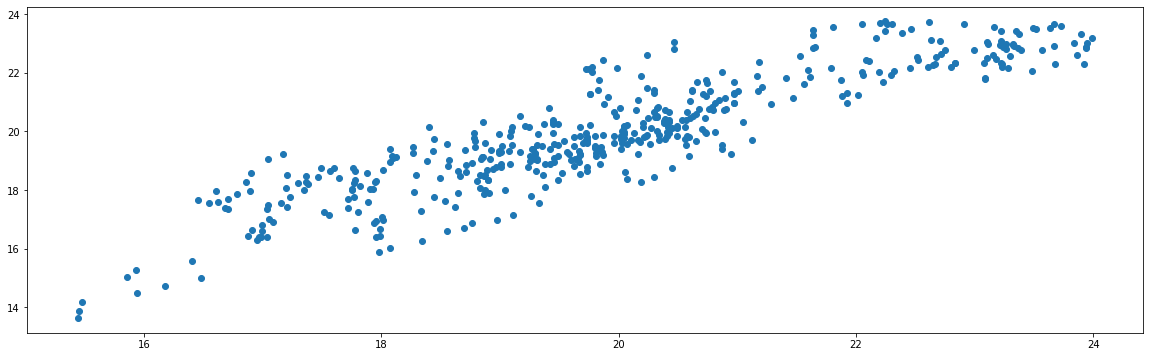

In [141]:
fig, ax = plt.subplots(figsize=(20,6))
ax.scatter(y_prediction_rfr, y_test)


In [63]:
import joblib
joblib.dump(rfr_inside, "/Users/szelie/python_projects/heat_mortality_productivity_impacts/input_data/regressions/random_forest_wbgt_inside.joblib")

['/Users/szelie/python_projects/heat_mortality_productivity_impacts/input_data/regressions/random_forest_wbgt_inside.joblib']

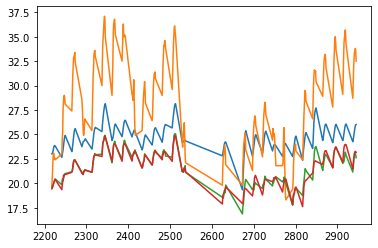

In [159]:
fig,ax =plt.subplots()

wbgt_7d = wbgt_inside[(wbgt_inside['time.mm']==8)]
ax.plot(wbgt_7d.index, wbgt_7d.operating_temperature)
ax.plot(wbgt_7d.index, wbgt_7d.tre200h0)


ax.plot(wbgt_7d.index, wbgt_7d.wbgt_inside)
wbgt_inside_est = rfr_inside.predict(wbgt_7d[['time.hh','tasmin','tasmax']])
ax.plot(wbgt_7d.index, wbgt_inside_est)



In [152]:
wbgt_7d

,time.dd,date,time.mm,time.hh,wbgt_inside,wbgt_sun,wbgt_shadow,tre200h0,operating_temperature,tasmin,tasmax
2221,1,2060-08-01 13:00:00,8,13,19.936037,19.328389,19.228489,23.1,23.539332,18.7,23.1
2242,2,2060-08-02 10:00:00,8,10,20.325656,23.505812,20.761828,24.5,22.892180,19.7,29.0
2243,2,2060-08-02 11:00:00,8,11,20.470424,23.011348,21.134266,25.2,23.171442,19.7,29.0
2244,2,2060-08-02 12:00:00,8,12,20.259084,24.827077,21.980096,27.5,23.454598,19.7,29.0
2245,2,2060-08-02 13:00:00,8,13,20.474146,25.179169,22.454738,28.4,23.831201,19.7,29.0
...,...,...,...,...,...,...,...,...,...,...,...
2947,31,2060-08-31 19:00:00,8,19,22.191928,24.468690,24.468690,31.1,25.839545,22.6,33.8
2948,31,2060-08-31 20:00:00,8,20,22.298550,23.983929,23.983929,29.8,25.706110,22.6,33.8
2949,31,2060-08-31 21:00:00,8,21,22.551882,23.111642,23.111642,27.5,25.576440,22.6,33.8
2950,31,2060-08-31 22:00:00,8,22,23.096366,22.533440,22.533440,26.7,26.895386,22.6,33.8


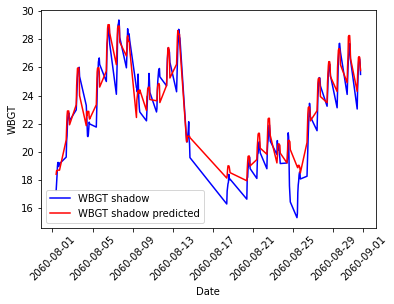

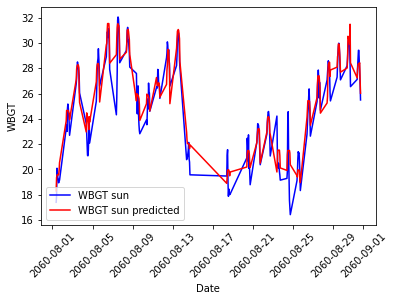

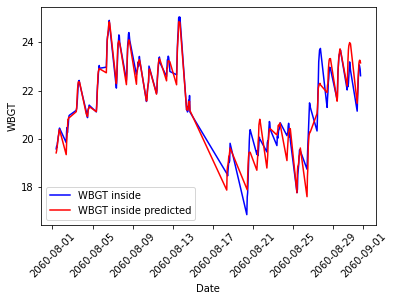

In [164]:
#### 

wbgt_sun_est = rfr_sun.predict(wbgt_7d[['time.hh','tasmin','tasmax']])
wbgt_shadow_est = rfr_shadow.predict(wbgt_7d[['time.hh','tasmin','tasmax']])



fig,ax =plt.subplots()

ax.plot(pd.to_datetime(wbgt_7d.date), wbgt_7d.wbgt_shadow, color='blue', label='WBGT shadow')
ax.plot(pd.to_datetime(wbgt_7d.date), wbgt_shadow_est, color='red', label='WBGT shadow predicted')


ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('WBGT')
ax.set_xlabel('Date')
ax.legend()
plt.savefig('../figures/wbgt_shadow.pdf',bbox_inches='tight')   




fig,ax =plt.subplots()
ax.plot(pd.to_datetime(wbgt_7d.date), wbgt_7d.wbgt_sun, color='blue', label='WBGT sun')
ax.plot(pd.to_datetime(wbgt_7d.date), wbgt_sun_est, color='red', label='WBGT sun predicted')
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('WBGT')
ax.set_xlabel('Date')
ax.legend()
plt.savefig('../figures/wbgt_sun.pdf',bbox_inches='tight')   


#wbgt_7d = wbgt_inside[wbgt_inside['station']==17]

wbgt_inside_est = rfr_inside.predict(wbgt_7d[['time.hh','tasmin','tasmax']])



fig,ax =plt.subplots()
ax.plot(pd.to_datetime(wbgt_7d.date), wbgt_7d.wbgt_inside, color='blue', label='WBGT inside')
ax.plot(pd.to_datetime(wbgt_7d.date), wbgt_inside_est, color='red', label='WBGT inside predicted')
ax.tick_params(axis='x', rotation=45)
ax.set_ylabel('WBGT')
ax.set_xlabel('Date')
ax.legend()
plt.savefig('../figures/wbgt_inside.pdf',bbox_inches='tight')   





In [544]:
pd.to_datetime(wbgt_7d_inside.date)

1473   2060-01-07 09:00:00
1474   2060-01-07 10:00:00
1475   2060-01-07 11:00:00
1476   2060-01-07 12:00:00
1477   2060-01-07 13:00:00
               ...        
2197   2060-07-31 13:00:00
2198   2060-07-31 14:00:00
2199   2060-07-31 15:00:00
2200   2060-07-31 16:00:00
2201   2060-07-31 17:00:00
Name: date, Length: 270, dtype: datetime64[ns]

In [545]:
pd.to_datetime(wbgt_7d.date)

145257   2060-08-01 09:00:00
145258   2060-08-01 10:00:00
145259   2060-08-01 11:00:00
145260   2060-08-01 12:00:00
145261   2060-08-01 13:00:00
                 ...        
145885   2060-08-27 13:00:00
145886   2060-08-27 14:00:00
145887   2060-08-27 15:00:00
145888   2060-08-27 16:00:00
145889   2060-08-27 17:00:00
Name: date, Length: 216, dtype: datetime64[ns]

In [165]:
from climada.util.api_client import Client

In [166]:
from climada.util.api_client import Client
client = Client()
dataset = client.get_dataset_info(name="earth_centroids_150asland_1800asoceans_distcoast_region_nopoles")
client.download_dataset(dataset=dataset)

In [172]:
dataset = client.get_dataset_info(name="earth_centroids_150asland_1800asoceans_distcoast_region_nopoles")

In [173]:
client.download_dataset(dataset=dataset)

(PosixPath('/Users/szelie/climada/data/hazard/centroids/earth_centroids_150asland_1800asoceans_distcoast_region_nopoles/v1'),
 [PosixPath('/Users/szelie/climada/data/hazard/centroids/earth_centroids_150asland_1800asoceans_distcoast_region_nopoles/v1/earth_centroids_150asland_1800asoceans_distcoast_region_nopoles.hdf5')])